In [1]:
import os
import json

import matplotlib.pyplot as plt

In [2]:
experiment_results_dir = "./bird_whisperer/experiments/results/"
experiment_results_files = os.listdir(experiment_results_dir)

In [3]:
def plot_experiment_results(results, experiment_name):
  test_epoch = results["test_epoch"]
  train_epoch = results["train_epoch"]
  train_loss = results["train_loss"]

  # Extract test metrics
  f1_scores = [metric["f1-score"] for metric in results["epoch_test_metrics"]]
  precisions = [metric["precision"] for metric in results["epoch_test_metrics"]]
  recalls = [metric["recall"] for metric in results["epoch_test_metrics"]]
  accuracies = [metric["accuracy"] for metric in results["epoch_test_metrics"]]
  test_losses = [metric["avg_loss"] for metric in results["epoch_test_metrics"]]

  # Create subplots
  fig, axs = plt.subplots(3, 2, figsize=(12, 10))

  # Train loss
  axs[0, 0].plot(train_epoch, train_loss, marker='o', label='Train Loss')
  axs[0, 0].set_title('Train Loss')
  axs[0, 0].set_xlabel('Epoch')
  axs[0, 0].set_ylabel('Loss')
  axs[0, 0].set_ylim(0)
  axs[0, 0].set_xticks(range(min(train_epoch), max(train_epoch) + 1))
  axs[0, 0].legend()

  # F1-score
  axs[0, 1].plot(test_epoch, f1_scores, marker='o', label='F1 Score')
  axs[0, 1].set_title('F1 Score')
  axs[0, 1].set_xlabel('Epoch')
  axs[0, 1].set_ylabel('F1 Score')
  axs[0, 1].set_ylim(0)
  axs[0, 1].set_xticks(range(min(test_epoch), max(test_epoch) + 1))
  axs[0, 1].legend()

  # Precision
  axs[1, 0].plot(test_epoch, precisions, marker='o', label='Precision')
  axs[1, 0].set_title('Precision')
  axs[1, 0].set_xlabel('Epoch')
  axs[1, 0].set_ylabel('Precision')
  axs[1, 0].set_ylim(0)
  axs[1, 0].set_xticks(range(min(test_epoch), max(test_epoch) + 1))
  axs[1, 0].legend()

  # Recall
  axs[1, 1].plot(test_epoch, recalls, marker='o', label='Recall')
  axs[1, 1].set_title('Recall')
  axs[1, 1].set_xlabel('Epoch')
  axs[1, 1].set_ylabel('Recall')
  axs[1, 1].set_ylim(0)
  axs[1, 1].set_xticks(range(min(test_epoch), max(test_epoch) + 1))
  axs[1, 1].legend()

  # Accuracy
  axs[2, 0].plot(test_epoch, accuracies, marker='o', label='Accuracy')
  axs[2, 0].set_title('Accuracy')
  axs[2, 0].set_xlabel('Epoch')
  axs[2, 0].set_ylabel('Accuracy')
  axs[2, 0].set_ylim(0)
  axs[2, 0].set_xticks(range(min(test_epoch), max(test_epoch) + 1))
  axs[2, 0].legend()

  # Test Loss
  axs[2, 1].plot(test_epoch, test_losses, marker='o', label='Test Loss')
  axs[2, 1].set_title('Test Loss')
  axs[2, 1].set_xlabel('Epoch')
  axs[2, 1].set_ylabel('Loss')
  axs[2, 1].set_ylim(0)
  axs[2, 1].set_xticks(range(min(test_epoch), max(test_epoch) + 1))
  axs[2, 1].legend()

  fig.suptitle(f"{experiment_name} Results")
  fig.tight_layout()

  return fig

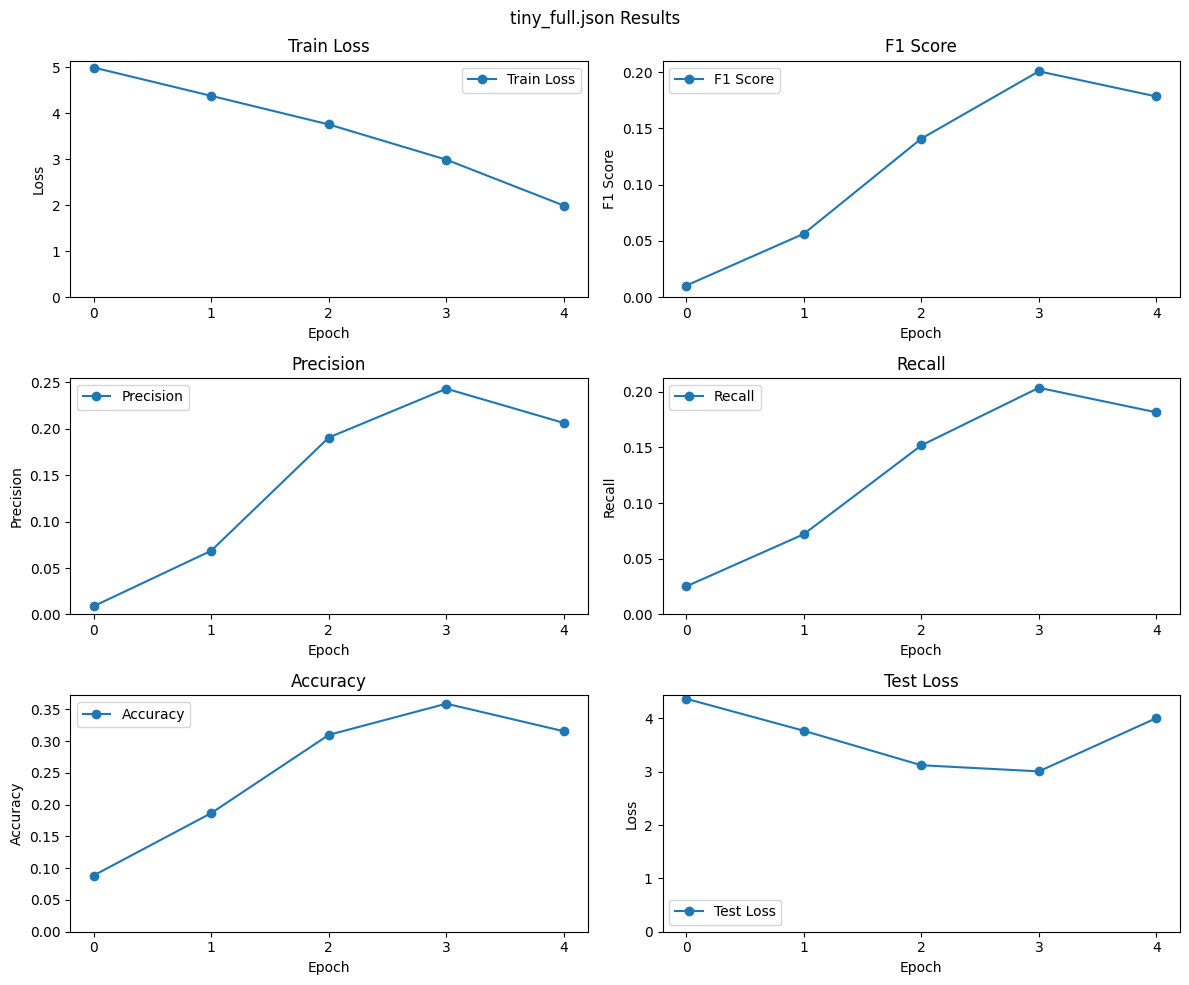

In [5]:
for experiment_results_file in experiment_results_files:
  with open(experiment_results_dir + experiment_results_file, "r") as f:
    results = json.load(f)
    plot = plot_experiment_results(results, experiment_results_file)
    plot